**Total Industrial Blue WF**

Convert the excel file into the cvs file for processing. The below part is to use the total industrial blue WF dataset for predicting the future WF.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Total Industrial Blue WF_Daily_2015-2019.csv")
df.columns = ['Date', 'WF']
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df.head(10)

,Date,WF
Date,,
2015-01-01,2015-01-01,34248.8509
2015-01-02,2015-01-02,21668.5765
2015-01-03,2015-01-03,90363.9566
2015-01-04,2015-01-04,71559.7380
2015-01-05,2015-01-05,13307.0881
2015-01-06,2015-01-06,115433.8876
2015-01-07,2015-01-07,147932.6797
2015-01-08,2015-01-08,121052.1816
2015-01-09,2015-01-09,11345.1284


Text(0, 0.5, 'WF')

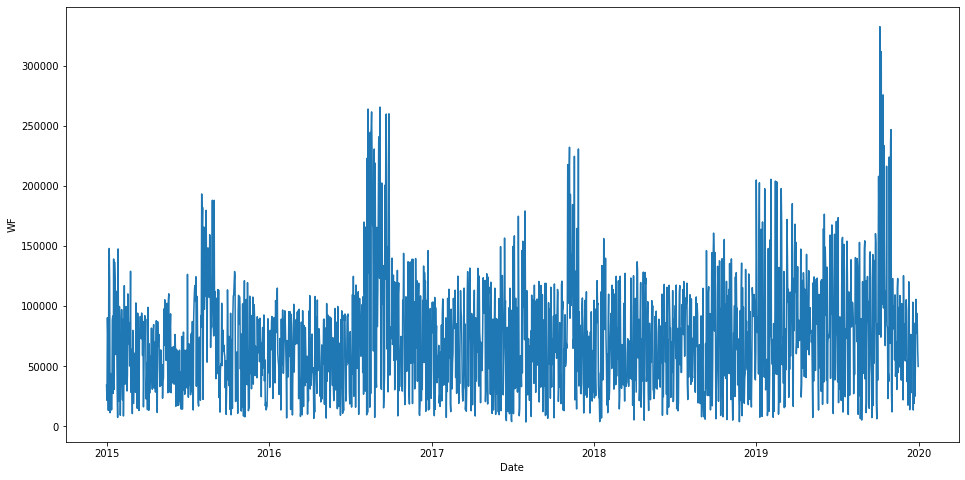

In [2]:
#illustrate the dataset
plt.figure(figsize=(16,8))
plt.plot(df['WF'])
plt.xlabel('Date')
plt.ylabel('WF')

Model building

In [3]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'WF'])
for i in range(0,len(df)):
    data['Date'][i] = df['Date'][i]
    data['WF'][i] = df['WF'][i]

#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = data.values

#there are 1826 dates of dataset (about 5 years)
#4 years datatset for training, 1 year for testing
train = dataset[0:1460,:]
valid = dataset[1460:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=60))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1)

1400/1400 [==============================] - 45s 30ms/step - loss: 0.0178


Model evaluation

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

inputs = data[len(data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

#root mean squared error
rms = np.sqrt(metrics.mean_squared_error(valid,pred))
rms

55808.79329920045

Results presentation

---


The blue line represents the training data. The orange line represents the testing data. The green line is the predicting values.

Text(0, 0.5, 'WF')

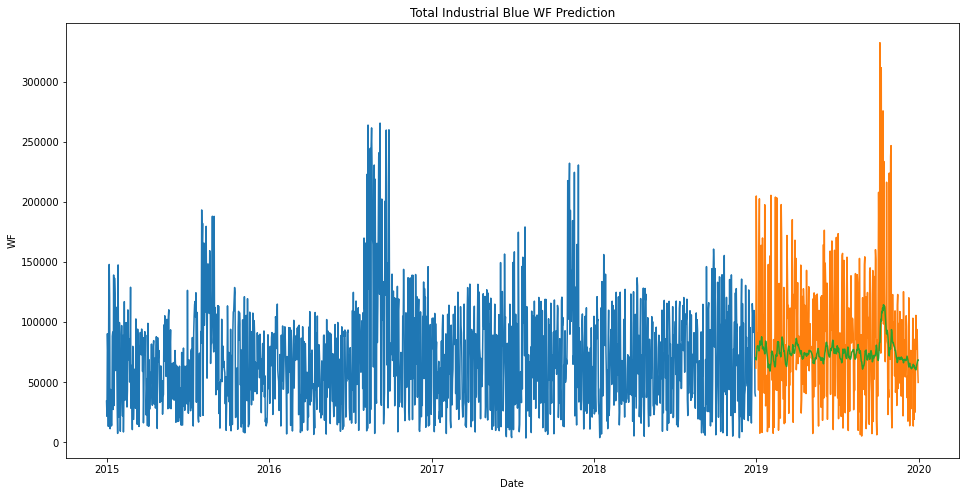

In [5]:
train = data[:1460]
valid = data[1460:]
valid['Predictions'] = pred

plt.figure(figsize=(16,8))
plt.plot(train['WF'])
plt.plot(valid[['WF','Predictions']])
plt.title('Total Industrial Blue WF Prediction')
plt.xlabel('Date')
plt.ylabel('WF')

Predict the values of WF for 5 years later (2020 to 2025) and 10 years later (2020 to 2030)

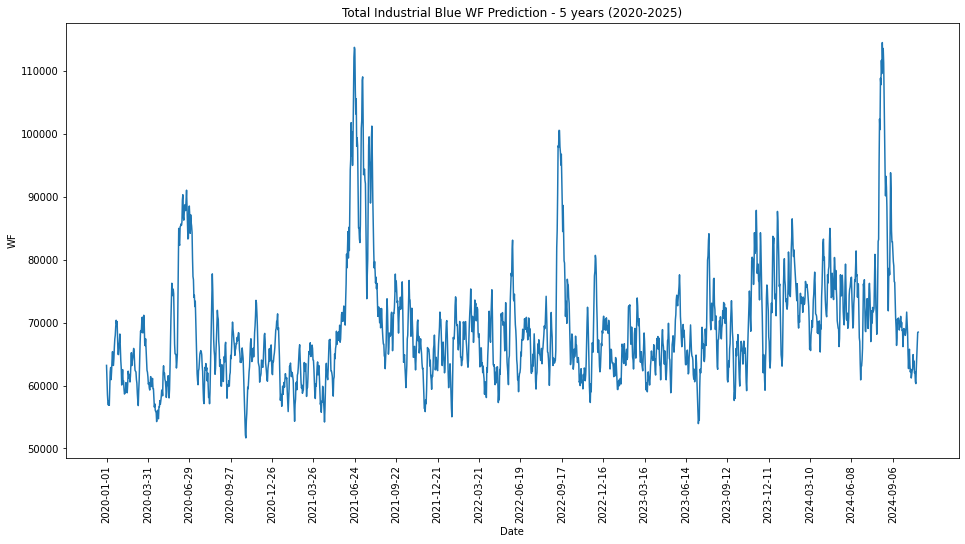

In [6]:
# 5 years prediction
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime

fiveyears = data
inputs = fiveyears[:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
test = []
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
pred = model.predict(test)
pred = scaler.inverse_transform(pred)

#plot the results
start_date = datetime.date(2020, 1, 1)
number_of_days = len(pred)
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]
plt.figure(figsize=(16,8))
plt.plot(date_list,pred)
plt.xticks(date_list[::90], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('WF')
plt.title('Total Industrial Blue WF Prediction - 5 years (2020-2025)')
plt.show()

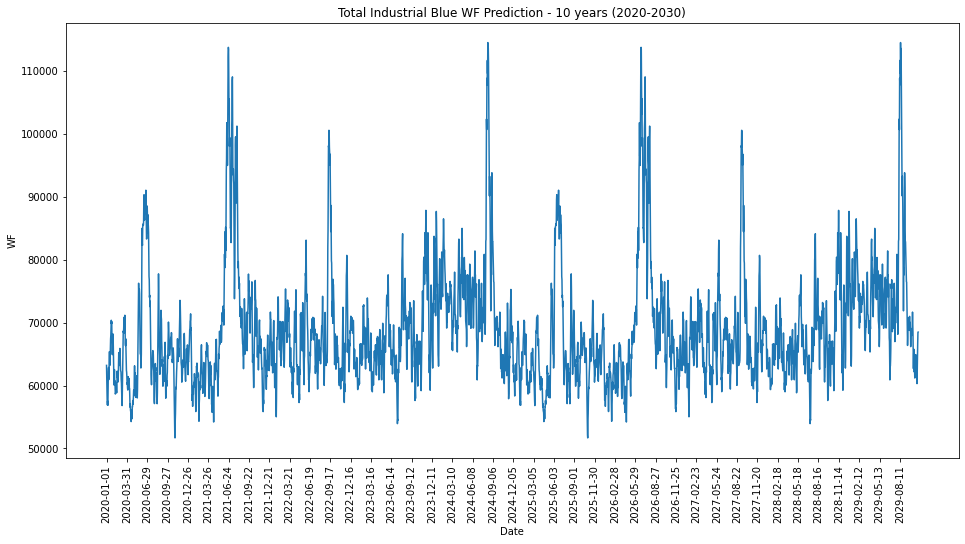

In [7]:
# 10 years prediction
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime

tenyears = pd.concat([data]*2)
inputs = tenyears[:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
test = []
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
pred = model.predict(test)
pred = scaler.inverse_transform(pred)

#plot the results
start_date = datetime.date(2020, 1, 1)
number_of_days = len(pred)
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]
plt.figure(figsize=(16,8))
plt.plot(date_list,pred)
plt.xticks(date_list[::90], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('WF')
plt.title('Total Industrial Blue WF Prediction - 10 years (2020-2030)')
plt.show()

**Total Industrial Blue WF (Panching area)**

Text(0, 0.5, 'WF')

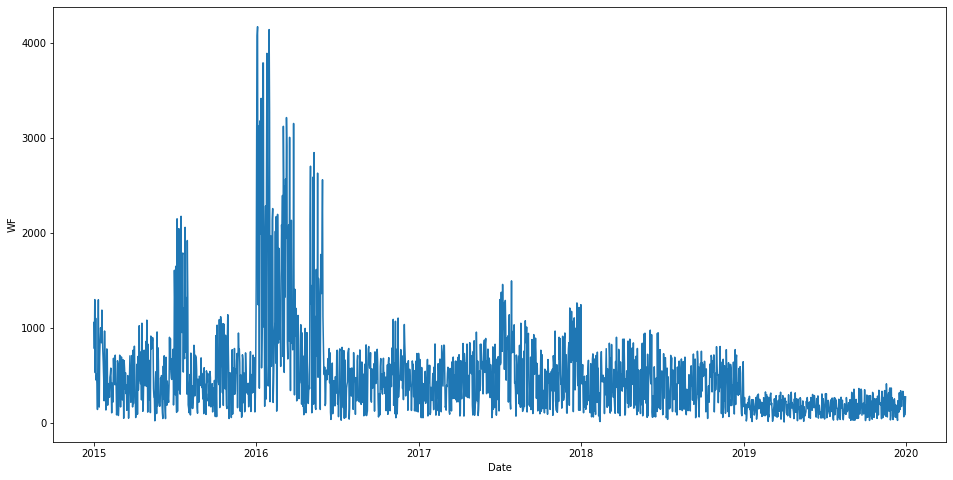

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

df = pd.read_csv("Total Industrial Blue WF_Daily_2015-2019_Panching.csv")
df.columns = ['Date', 'WF']
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

#illustrate the dataset
plt.figure(figsize=(16,8))
plt.plot(df['WF'])
plt.xlabel('Date')
plt.ylabel('WF')

In [9]:
#creating dataframe
df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'WF'])
for i in range(0,len(df)):
    data['Date'][i] = df['Date'][i]
    data['WF'][i] = df['WF'][i]
#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)
#creating train and test sets
dataset = data.values
#there are 1826 dates of dataset (about 5 years)
#4 years datatset for training, 1 year for testing
train = dataset[0:1460,:]
valid = dataset[1460:,:]
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#model building and training
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=60))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1)

1400/1400 [==============================] - 45s 30ms/step - loss: 0.0121


Text(0, 0.5, 'WF')

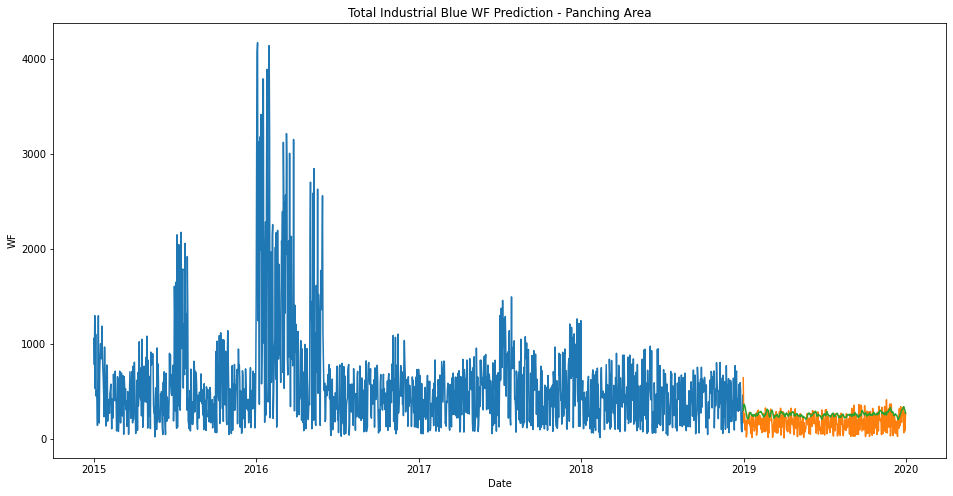

In [10]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

inputs = data[len(data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

train = data[:1460]
valid = data[1460:]
valid['Predictions'] = pred

plt.figure(figsize=(16,8))
plt.plot(train['WF'])
plt.plot(valid[['WF','Predictions']])
plt.title('Total Industrial Blue WF Prediction - Panching Area')
plt.xlabel('Date')
plt.ylabel('WF')

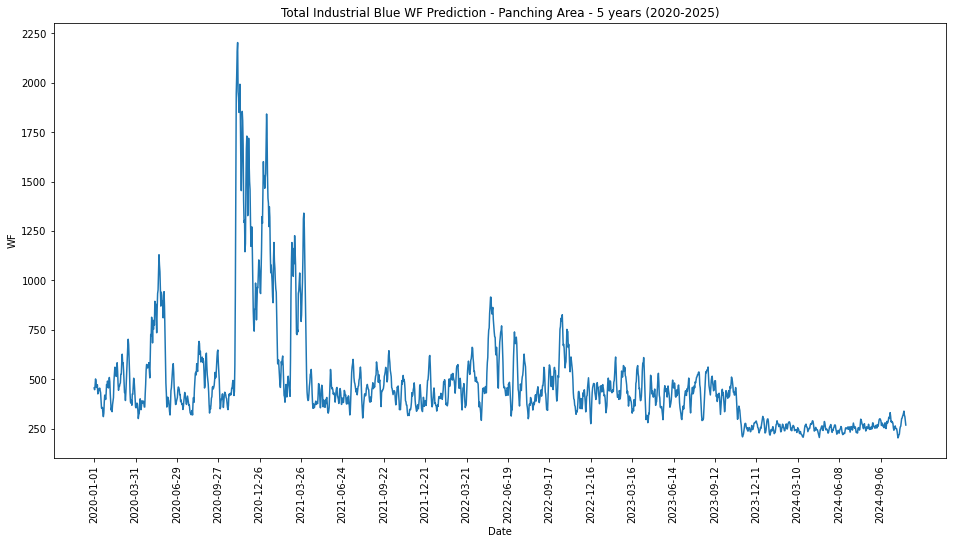

In [11]:
# 5 years prediction
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime

fiveyears = data
inputs = fiveyears[:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
test = []
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
pred = model.predict(test)
pred = scaler.inverse_transform(pred)

#plot the results
start_date = datetime.date(2020, 1, 1)
number_of_days = len(pred)
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]
plt.figure(figsize=(16,8))
plt.plot(date_list,pred)
plt.xticks(date_list[::90], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('WF')
plt.title('Total Industrial Blue WF Prediction - Panching Area - 5 years (2020-2025)')
plt.show()

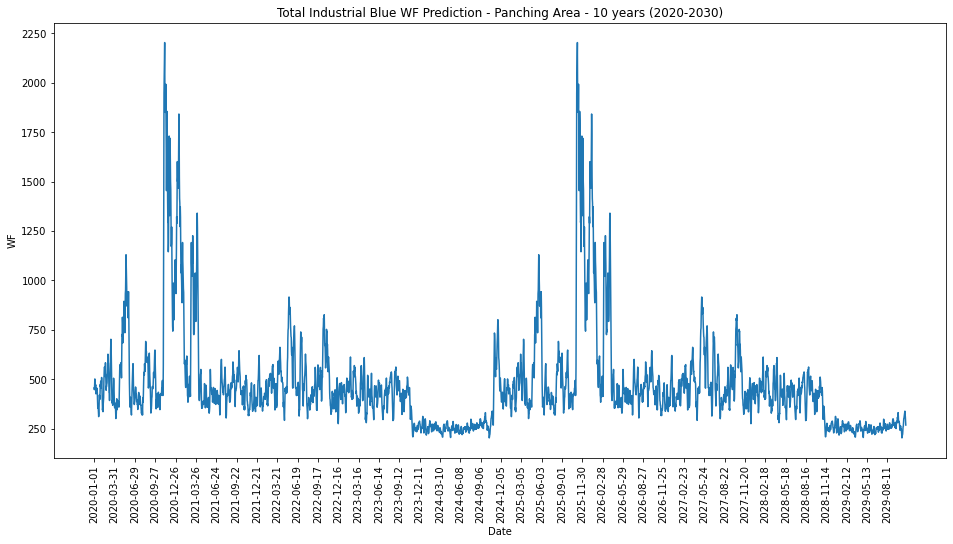

In [12]:
# 10 years prediction
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime

tenyears = pd.concat([data]*2)
inputs = tenyears[:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
test = []
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
pred = model.predict(test)
pred = scaler.inverse_transform(pred)

#plot the results
start_date = datetime.date(2020, 1, 1)
number_of_days = len(pred)
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]
plt.figure(figsize=(16,8))
plt.plot(date_list,pred)
plt.xticks(date_list[::90], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('WF')
plt.title('Total Industrial Blue WF Prediction - Panching Area - 10 years (2020-2030)')
plt.show()

**Total Industrial Blue WF (Semambu area)**


Text(0, 0.5, 'WF')

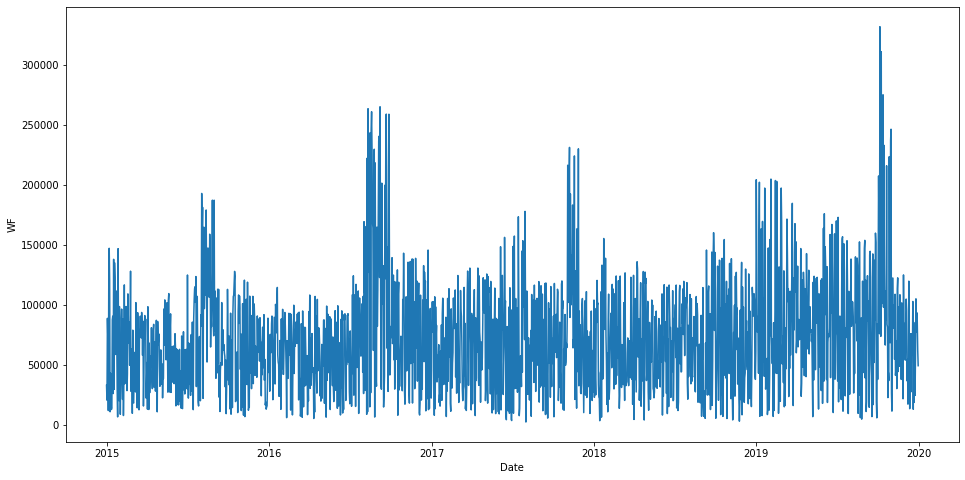

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

df = pd.read_csv("Total Industrial Blue WF_Daily_2015-2019_Semambu.csv")
df.columns = ['Date', 'WF']
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

#illustrate the dataset
plt.figure(figsize=(16,8))
plt.plot(df['WF'])
plt.xlabel('Date')
plt.ylabel('WF')

In [14]:
#creating dataframe
df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'WF'])
for i in range(0,len(df)):
    data['Date'][i] = df['Date'][i]
    data['WF'][i] = df['WF'][i]
#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)
#creating train and test sets
dataset = data.values
#there are 1826 dates of dataset (about 5 years)
#4 years datatset for training, 1 year for testing
train = dataset[0:1460,:]
valid = dataset[1460:,:]
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#model building and training
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=60))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1)

1400/1400 [==============================] - 45s 30ms/step - loss: 0.0173


Text(0, 0.5, 'WF')

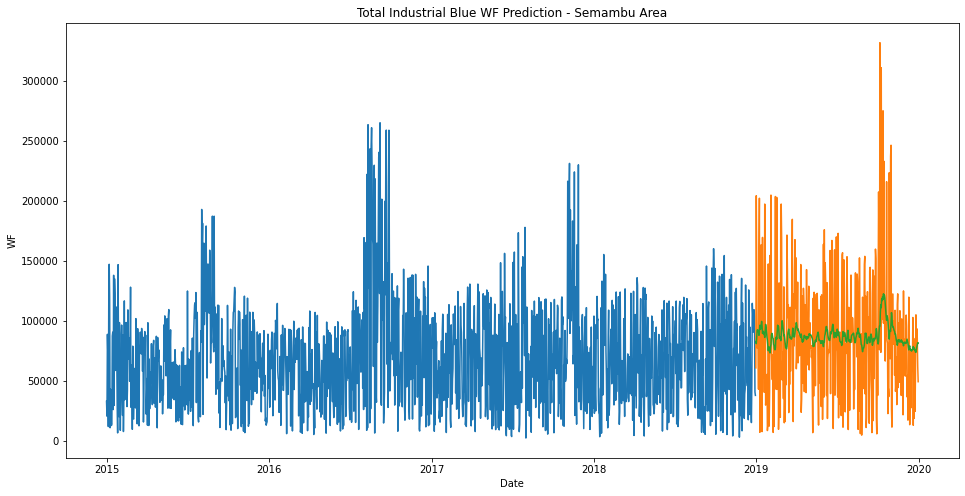

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

inputs = data[len(data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

train = data[:1460]
valid = data[1460:]
valid['Predictions'] = pred

plt.figure(figsize=(16,8))
plt.plot(train['WF'])
plt.plot(valid[['WF','Predictions']])
plt.title('Total Industrial Blue WF Prediction - Semambu Area')
plt.xlabel('Date')
plt.ylabel('WF')

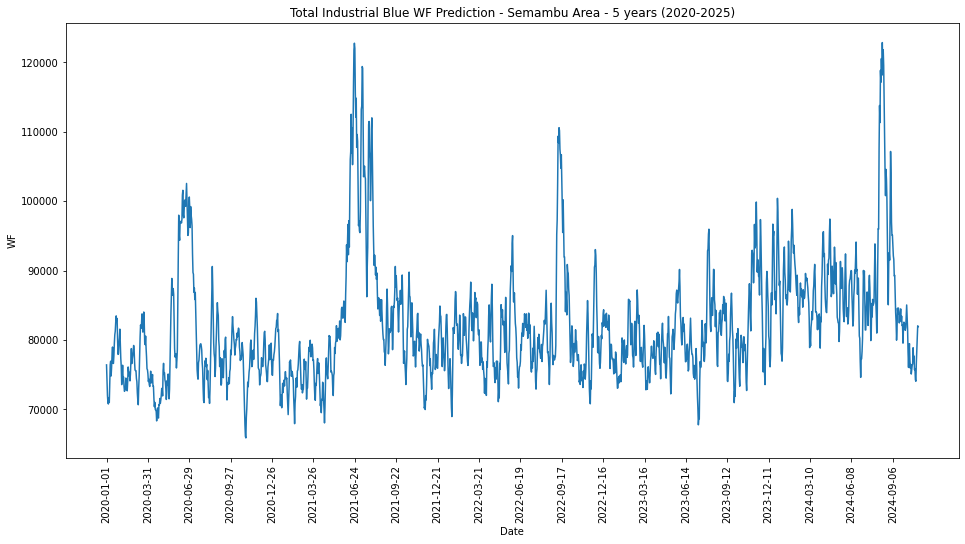

In [16]:
# 5 years prediction
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime

fiveyears = data
inputs = fiveyears[:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
test = []
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
pred = model.predict(test)
pred = scaler.inverse_transform(pred)

#plot the results
start_date = datetime.date(2020, 1, 1)
number_of_days = len(pred)
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]
plt.figure(figsize=(16,8))
plt.plot(date_list,pred)
plt.xticks(date_list[::90], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('WF')
plt.title('Total Industrial Blue WF Prediction - Semambu Area - 5 years (2020-2025)')
plt.show()

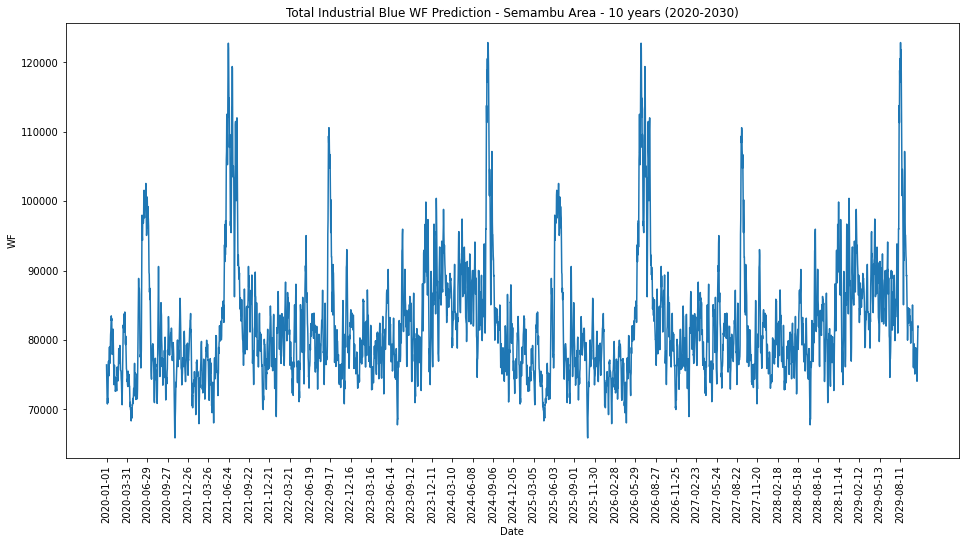

In [17]:
# 10 years prediction
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime

tenyears = pd.concat([data]*2)
inputs = tenyears[:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
test = []
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
pred = model.predict(test)
pred = scaler.inverse_transform(pred)

#plot the results
start_date = datetime.date(2020, 1, 1)
number_of_days = len(pred)
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]
plt.figure(figsize=(16,8))
plt.plot(date_list,pred)
plt.xticks(date_list[::90], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('WF')
plt.title('Total Industrial Blue WF Prediction - Semambu Area - 10 years (2020-2030)')
plt.show()